In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
# Image and path setup
img_size = 224
batch_size = 32
dataset_path = "../dataset"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

Found 1659 images belonging to 2 classes.
Found 413 images belonging to 2 classes.


In [4]:
# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("model.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[checkpoint]
)

d:\Accident-Detection-3\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Accident-Detection-3\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6713 - loss: 12.3300
Epoch 1: val_accuracy improved from -inf to 0.47458, saving model to model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.6723 - loss: 12.3037 - val_accuracy: 0.4746 - val_loss: 5.2233
Epoch 2/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7689 - loss: 7.6921
Epoch 2: val_accuracy did not improve from 0.47458
52/52 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.7693 - loss: 7.6827 - val_accuracy: 0.4746 - val_loss: 21.4457
Epoch 3/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8171 - loss: 2.8604
Epoch 3: val_accuracy did not improve from 0.47458
52/52 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8171 - loss: 2.8535 - val_accuracy: 0.4746 - val_loss: 6.0776
Epoch 4/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8431 - loss: 1.5130
Epoch 4: val_accuracy improved from 0.47458 to 0.59564, saving model to model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.

In [5]:
# Save model architecture
with open("model.json", "w") as f:
    f.write(model.to_json())

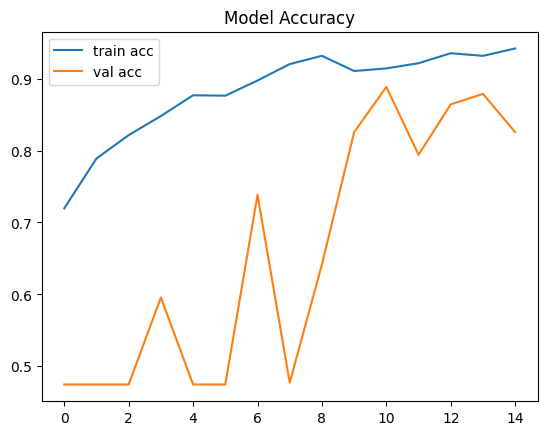

In [6]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Model Accuracy")
plt.show()